In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

In [0]:
path="/content/drive/My Drive/database_folder/iitdelhi/clean_master_data.csv"

In [3]:
data=pd.read_csv(path)

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
print(len(data))
data

783219


,Unnamed: 0,Unnamed: 0.1,username,text,score,label,serial
0,0,0.0,TransformingUt1,august,0,Neu,NaN
1,1,1.0,123Shivalik,today precious day someone special born fight ...,1,Pos,NaN
2,2,2.0,oltraveller,something unexplainably lovely small hill town...,1,Pos,NaN
3,3,3.0,123Shivalik,dreaming waking beautiful mesmerizing view mou...,5,Pos,NaN
4,4,4.0,etsyBALLHAWKNET,chicago cubs game heart pendant baseball jewelry,0,Neu,NaN
...,...,...,...,...,...,...,...
783214,783214,49826.0,VrindavanToday,lives kabul heart vraj,0,Neu,NaN
783215,783215,49827.0,traveltriangle,witness fun frolic without fail year,1,Pos,NaN
783216,783216,49828.0,Pehlikhabar,refuses allow construction activity riverfront...,-1,Neg,NaN
783217,783217,49829.0,MayurGu07070953,just refuses allow construction activity river...,-1,Neg,NaN


In [5]:

data.label.value_counts()

Neu    406397
Pos    272263
Neg    104559
Name: label, dtype: int64

In [0]:
# for text preprcoessing
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import re


In [7]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [8]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [9]:
# keras library
from keras.utils import to_categorical
import random
import tensorflow as tf
from sklearn.model_selection import train_test_split
from keras.preprocessing import sequence
from keras.preprocessing.text import Tokenizer
from keras.layers import Dense, Dropout, Embedding, LSTM, Flatten
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.losses import categorical_crossentropy
from keras.optimizers import Adam
from keras.models import Sequential

Using TensorFlow backend.


In [0]:
tf.random.set_seed(5)

In [0]:
lemmatizer=WordNetLemmatizer()

In [0]:
# data preprocessing
def preprocess(data):
  review=[]
  for cmt  in tqdm(data['text']):
    clean_cmt=re.sub("[^a-zA-Z]", " ",str(cmt))
    words=word_tokenize(clean_cmt.lower())
    lemma_word=[lemmatizer.lemmatize(word) for word in words]
    review.append(lemma_word)
  return(review)

In [13]:
clean_data=preprocess(data)

100%|██████████| 783219/783219 [02:12<00:00, 5916.10it/s]


In [14]:
data


,Unnamed: 0,Unnamed: 0.1,username,text,score,label,serial
0,0,0.0,TransformingUt1,august,0,Neu,NaN
1,1,1.0,123Shivalik,today precious day someone special born fight ...,1,Pos,NaN
2,2,2.0,oltraveller,something unexplainably lovely small hill town...,1,Pos,NaN
3,3,3.0,123Shivalik,dreaming waking beautiful mesmerizing view mou...,5,Pos,NaN
4,4,4.0,etsyBALLHAWKNET,chicago cubs game heart pendant baseball jewelry,0,Neu,NaN
...,...,...,...,...,...,...,...
783214,783214,49826.0,VrindavanToday,lives kabul heart vraj,0,Neu,NaN
783215,783215,49827.0,traveltriangle,witness fun frolic without fail year,1,Pos,NaN
783216,783216,49828.0,Pehlikhabar,refuses allow construction activity riverfront...,-1,Neg,NaN
783217,783217,49829.0,MayurGu07070953,just refuses allow construction activity river...,-1,Neg,NaN


In [0]:
k=data['label']
sentiment=k

In [17]:
sentiment

0         Neu
1         Pos
2         Pos
3         Pos
4         Neu
         ... 
783214    Neu
783215    Pos
783216    Neg
783217    Neg
783218    Neu
Name: label, Length: 783219, dtype: object

In [18]:

for i in range(len(sentiment)):
  if sentiment[i]=='Pos':
    sentiment[i]=0
  elif sentiment[i]=='Neg':
      sentiment[i]=1
  elif sentiment[i]=='Neu':
    sentiment[i]=2   



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [20]:
# we need to convert sentiment into  one hot encoder
sentiment

0         2
1         0
2         0
3         0
4         2
         ..
783214    2
783215    0
783216    1
783217    1
783218    2
Name: label, Length: 783219, dtype: object

In [0]:
sentiment.to_csv('master_sentiment.csv')

In [0]:
y=to_categorical(sentiment)

In [23]:
y.shape[1]

3

In [24]:
y

array([[0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       ...,
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.]], dtype=float32)

In [25]:
data

,Unnamed: 0,Unnamed: 0.1,username,text,score,label,serial
0,0,0.0,TransformingUt1,august,0,2,NaN
1,1,1.0,123Shivalik,today precious day someone special born fight ...,1,0,NaN
2,2,2.0,oltraveller,something unexplainably lovely small hill town...,1,0,NaN
3,3,3.0,123Shivalik,dreaming waking beautiful mesmerizing view mou...,5,0,NaN
4,4,4.0,etsyBALLHAWKNET,chicago cubs game heart pendant baseball jewelry,0,2,NaN
...,...,...,...,...,...,...,...
783214,783214,49826.0,VrindavanToday,lives kabul heart vraj,0,2,NaN
783215,783215,49827.0,traveltriangle,witness fun frolic without fail year,1,0,NaN
783216,783216,49828.0,Pehlikhabar,refuses allow construction activity riverfront...,-1,1,NaN
783217,783217,49829.0,MayurGu07070953,just refuses allow construction activity river...,-1,1,NaN


splitting dataset to train test and valdation

In [0]:
data.to_csv('master_label_data.csv')

In [0]:
x_train,x_test,y_train,y_test=train_test_split(clean_data,y,test_size=.05,stratify=y)

In [28]:
print(len(x_train),len(x_test))

744058 39161


In [0]:
x_train,x_val,y_train,y_val=train_test_split(x_train,y_train,test_size=.2,stratify=y_train)

In [33]:
print(len(x_train),len(x_val))

595246 148812


In [0]:
# x_train

In [0]:
# clean_data

In [36]:
unique_word=set()

max_len=0;

for i in tqdm(clean_data):
  unique_word.update(i)
  if len(i)>max_len:
    max_len=len(i)


100%|██████████| 783219/783219 [00:00<00:00, 784041.12it/s]


In [37]:
len(unique_word)

291169

Tokenization

In [0]:
tokenizer=Tokenizer(num_words=len(list(unique_word)))
tokenizer.fit_on_texts(list(clean_data))

In [0]:
def text_to_seq(text,tokenizer):
  return tokenizer.texts_to_sequences(text)

def pad_sequence(seq,max_len):
  return sequence.pad_sequences(seq,max_len)

In [0]:
x_train=text_to_seq(x_train,tokenizer)
x_test=text_to_seq(x_test,tokenizer)
x_val=text_to_seq(x_val,tokenizer)

In [41]:
x_train[0]

[104, 5062, 223, 180, 1575, 360]

In [0]:
# Padding
x_train=pad_sequence(x_train,max_len)
x_test=pad_sequence(x_test,max_len)
x_val=pad_sequence(x_val,max_len)

In [43]:
x_train[0]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,  104, 5062,  223,  180,
       1575,  360], dtype=int32)

early stopping

In [0]:
back_call=[EarlyStopping(monitor='val_acc',patience=5,min_delta=.001,mode="max"),
           ModelCheckpoint(filepath="lstm_model.h5",save_best_only=True,save_weights_only=False)]

In [45]:
num_classes=y.shape[1]
num_classes

3

In [46]:
model = Sequential(name="Model #1")
model.add(Embedding(len(list(unique_word)), 256, input_length=max_len, name="Embedding"))
model.add(LSTM(128, dropout=0.5, recurrent_dropout=0.5, return_sequences=True, name="LSTM1"))
model.add(LSTM(64, dropout=0.5, recurrent_dropout=0.5, return_sequences=False, name="LSTM2"))
model.add(Dense(100, activation="relu", name="Dense1"))
model.add(Dropout(0.5, name="Dropout1"))
model.add(Dense(num_classes, activation="softmax", name="Output"))
model.compile(loss="categorical_crossentropy", optimizer=Adam(lr=0.005), metrics=['accuracy'])
model.summary()

Model: "Model #1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Embedding (Embedding)        (None, 46, 256)           74539264  
_________________________________________________________________
LSTM1 (LSTM)                 (None, 46, 128)           197120    
_________________________________________________________________
LSTM2 (LSTM)                 (None, 64)                49408     
_________________________________________________________________
Dense1 (Dense)               (None, 100)               6500      
_________________________________________________________________
Dropout1 (Dropout)           (None, 100)               0         
_________________________________________________________________
Output (Dense)               (None, 3)                 303       
Total params: 74,792,595
Trainable params: 74,792,595
Non-trainable params: 0
______________________________________________

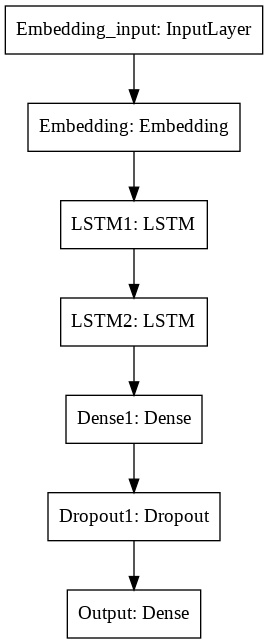

In [47]:
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='model.png')

In [48]:
history = model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=5, batch_size=256, verbose=1, callbacks=back_call)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 595246 samples, validate on 148812 samples
Epoch 1/5
595246/595246 [==============================] - 536s 900us/step - loss: 0.1332 - accuracy: 0.9558 - val_loss: 0.0591 - val_accuracy: 0.9801


/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:846: RuntimeWarning: Early stopping conditioned on metric `val_acc` which is not available. Available metrics are: val_loss,val_accuracy,loss,accuracy
  (self.monitor, ','.join(list(logs.keys()))), RuntimeWarning


Epoch 2/5
595246/595246 [==============================] - 532s 893us/step - loss: 0.0507 - accuracy: 0.9826 - val_loss: 0.0590 - val_accuracy: 0.9817
Epoch 3/5
595246/595246 [==============================] - 529s 888us/step - loss: 0.0409 - accuracy: 0.9864 - val_loss: 0.0643 - val_accuracy: 0.9814
Epoch 4/5
595246/595246 [==============================] - 528s 887us/step - loss: 0.0365 - accuracy: 0.9881 - val_loss: 0.0669 - val_accuracy: 0.9813
Epoch 5/5
595246/595246 [==============================] - 531s 893us/step - loss: 0.0351 - accuracy: 0.9887 - val_loss: 0.0687 - val_accuracy: 0.9810


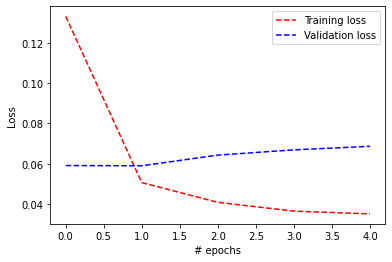

In [49]:
plt.plot(history.history['loss'], 'r--')
plt.plot(history.history['val_loss'], 'b--')
plt.legend(['Training loss', 'Validation loss'])
plt.xlabel("# epochs")
plt.ylabel("Loss")
plt.show()

In [51]:
from keras.models import load_model
model=load_model('/content/lstm_model.h5')

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


In [0]:
y_pred=model.predict_classes(x_test)


In [53]:
y_pred

array([2, 0, 2, ..., 2, 0, 1])

In [55]:
y_test

array([[0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       ...,
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.]], dtype=float32)

In [0]:
testsc=0;
for i in range(len(y_pred)):
  if y_test[i][y_pred[i]]==1:
    testsc=testsc+1

In [62]:
print("test accuracy ",(testsc/len(y_pred)))

test accuracy  0.9805418656316233


In [0]:
# def custom_test_case(sentence):
#   clean_phrase=re.sub("[^a-zA-Z]", " ", sentence)
#   words = word_tokenize(clean_phrase.lower())
#   lemma_words = [lemmatizer.lemmatize(word) for word in words]
#   # print(lemma_words)
#   tt=text_to_seq(lemma_words,tokenizer)
#   # print(tt)
#   tt=sequence.pad_sequences(tt,max_len)
#   # print(tt)
#   y_temp=model.predict_classes(tt)
#   return y_temp  






In [0]:
# ck='this is a beautiful place everyone should visit here'
# z=custom_test_case(ck)

In [0]:
# z
# print(len(ck))